In [199]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import warnings 
warnings.simplefilter('ignore')

import seaborn as sns

In [174]:
pwd_data = pd.read_csv("datasets/DSL-StrongPasswordData-003-010.csv", header = 0)

<Axes: title={'center': 'Average Keystroke Latency per Subject'}>

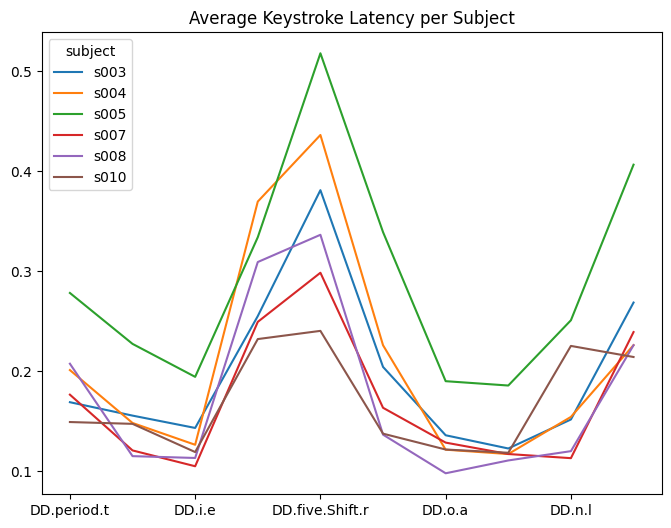

In [175]:
# Average Keystroke Latency per Subject

DD = [dd for dd in pwd_data.columns if dd.startswith('DD')]
plot = pwd_data[DD]
plot['subject'] = pwd_data['subject'].values
plot = plot.groupby('subject').mean()

plot.iloc[:6].T.plot(figsize=(8, 6), title='Average Keystroke Latency per Subject')

In [176]:
data_train, data_test = train_test_split(pwd_data, test_size = 0.2, random_state=0)

X_train = data_train[pwd_data.columns[2:]]
y_train = data_train['subject']

X_test = data_test[pwd_data.columns[2:]]
y_test = data_test['subject']

In [177]:
knc = KNeighborsClassifier()

knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

knc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)

K-Nearest Neighbor Classifier Accuracy: 0.6166666666666667


In [178]:
# На відредагованому наборі даних точність покращилась навіть при дефолтних параметрах. 
# Новий датасет включая в себе об'єкти з s003 по s010

In [179]:
knc = KNeighborsClassifier(weights='distance', p=1)
# Дефолтні гіперпараметри (n_neighbors=5, *, weights='uniform', algorithm='auto',
# leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

# Після серії експериментів залишив два модіфіковані параметри (зміна ваги сусідів в залежності
# від дистанції та манхеттенську дистанцію) застосування яких привело до покращення точності на 0,1

knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

knc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)


K-Nearest Neighbor Classifier Accuracy: 0.74375


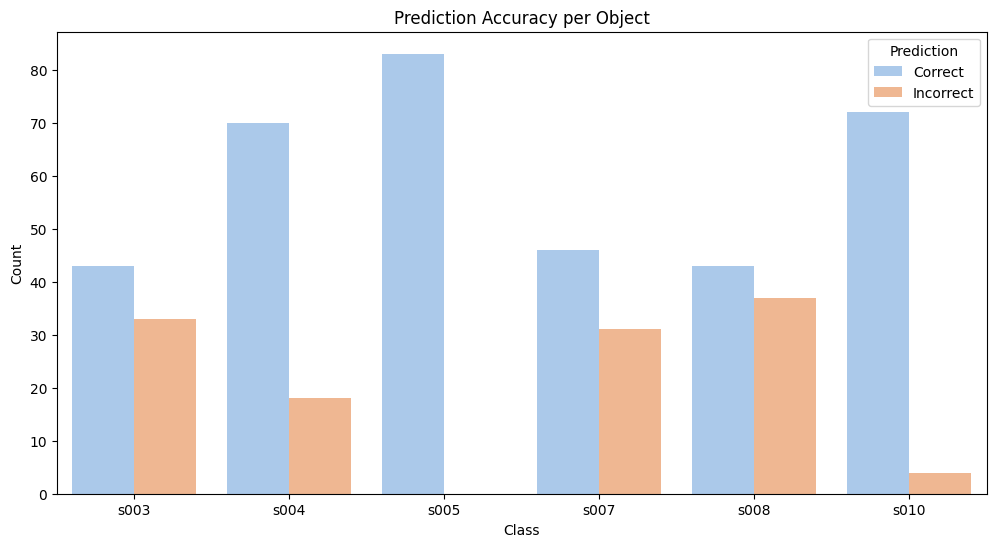

In [180]:
# Цікава візуализація точності передбачень по обʼєктах

plt.figure(figsize=(12, 6))
accuracy_per_class = pd.DataFrame({
    'Class': knc.classes_,
    'Correct': [(y_test == y_pred)[y_test == cls].sum() for cls in knc.classes_],
    'Incorrect': [(y_test != y_pred)[y_test == cls].sum() for cls in knc.classes_]
})

accuracy_per_class = accuracy_per_class.melt(id_vars='Class', value_vars=['Correct', 'Incorrect'],
                                             var_name='Prediction', value_name='Count')

sns.barplot(data=accuracy_per_class, x='Class', y='Count', hue='Prediction', palette='pastel')
plt.title('Prediction Accuracy per Object')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Prediction')
plt.show()

Text(0, 0.5, 'True')

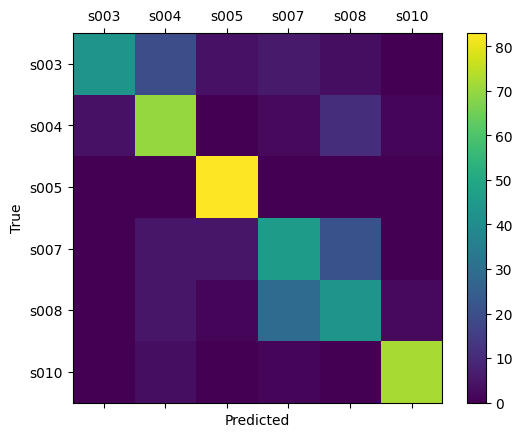

In [181]:
# Візуалізую за допомогою матриці помилок

from sklearn.metrics import confusion_matrix

labels = list(pwd_data['subject'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels) 

figure = plt.figure()
axes = figure.add_subplot(111)
figure.colorbar(axes.matshow(cm))
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [189]:
svc = svm.SVC(kernel='linear') 
# Дефолтні гіперпараметри (*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0,
# shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None,
#verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Support Vector Linear Classifier Accuracy:', svc_accuracy)

Support Vector Linear Classifier Accuracy: 0.9208333333333333


Text(0, 0.5, 'True')

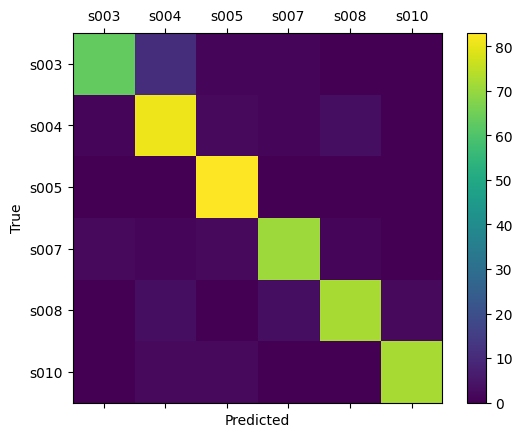

In [183]:
labels = list(pwd_data['subject'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels) 

figure = plt.figure()
axes = figure.add_subplot(111)
figure.colorbar(axes.matshow(cm))
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [198]:
mlpc = MLPClassifier(hidden_layer_sizes=(100),activation='tanh')
# Дефолтні гіперпараметри (hidden_layer_sizes=(100), activation='relu', *, solver='adam',
# alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
# power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
# warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
# validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10,
# max_fun=15000)

#підвищення кількості прихованих шарів, або зміна функції активації додає в точності близько 0,05

mlpc.fit(X_train,y_train)

y_pred = mlpc.predict(X_test)

mlpc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Multi Layer Perceptron Classifier Accuracy:', mlpc_accuracy)

Multi Layer Perceptron Classifier Accuracy: 0.9708333333333333


Text(0, 0.5, 'True')

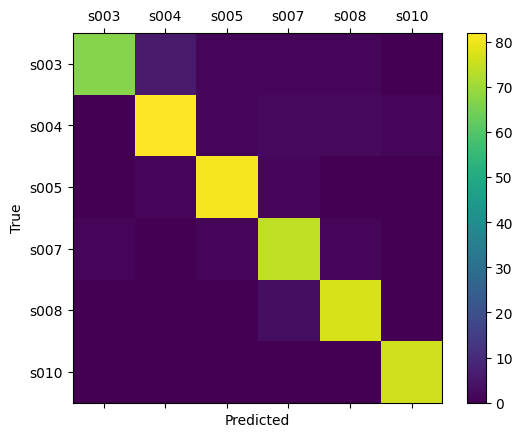

In [185]:
labels = list(pwd_data['subject'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels) 

figure = plt.figure()
axes = figure.add_subplot(111)
figure.colorbar(axes.matshow(cm))
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [186]:
# Підготовка даних для нового субʼєкта s002 який я виключив в тренувальних даних

new_subject_data = pd.read_csv("datasets/DSL-StrongPasswordData-002.csv", header = 0)

X_new_subject = new_subject_data[pwd_data.columns[2:]]

# Використовуємо навчані моделі для передбачень
knc_prediction = knc.predict(X_new_subject)
svc_prediction = svc.predict(X_new_subject)
mlpc_prediction = mlpc.predict(X_new_subject)

# Виводимо передбачення
print('K-Nearest Neighbor Classifier Prediction:', knc_prediction)
print('Support Vector Linear Classifier Prediction:', svc_prediction)
print('Multi Layer Perceptron Classifier Prediction:', mlpc_prediction)


K-Nearest Neighbor Classifier Prediction: ['s004' 's004' 's004' 's005' 's003' 's004' 's005' 's004' 's004' 's004'
 's004' 's004' 's004' 's005' 's005' 's004' 's004' 's004' 's005' 's005'
 's004' 's008' 's005' 's005' 's005' 's007' 's005' 's005' 's005' 's003'
 's005' 's005' 's005' 's005' 's005' 's005' 's005' 's005' 's008' 's005'
 's004' 's005' 's004' 's005' 's005' 's008' 's004' 's005' 's004' 's005'
 's004' 's004' 's004' 's004' 's008' 's004' 's004' 's004' 's004' 's004'
 's004' 's004' 's005' 's005' 's004' 's004' 's004' 's004' 's005' 's004'
 's004' 's004' 's004' 's004' 's004' 's004' 's007' 's004' 's004' 's004'
 's004' 's004' 's004' 's007' 's007' 's004' 's004' 's004' 's004' 's010'
 's003' 's004' 's004' 's004' 's004' 's008' 's004' 's005' 's005' 's004'
 's004' 's004' 's007' 's004' 's004' 's004' 's003' 's004' 's004' 's004'
 's008' 's004' 's005' 's004' 's004' 's004' 's005' 's004' 's004' 's005'
 's003' 's004' 's004' 's008' 's004' 's004' 's008' 's004' 's004' 's005'
 's004' 's004' 's008' 's007' 's004'

In [187]:
# серед отриманих передбачень я не знаходжу субʼєкт s002, тобто він не детектується
# перевірка за допомогою датасету з включенням субʼєкта s002 підтверджує висновок, тобто s002 детектується
